<a href="https://colab.research.google.com/github/mshsu/stat400-sets/blob/main/earthquakes_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Earthquakes Demo

The **exponential distribution** can be used to model time between instances of independent, regularly occuring events. Let's look at an example of this in *real time* US Geological Survey (USGS) earthquakes data from the past 30 days. (More info found [here](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php). This data is updated every minute!) Can we model the time between 5.0+ magnitude earthquakes using the exponential distribution?

## Setup

In [ ]:
!pip install symbulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 KB 1.5 MB/s eta 0:00:00


In [ ]:
from symbulate import *
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings("ignore")

## Data

In [ ]:
df_earthquakes = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv")

df_earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-13T14:40:04.580Z,44.5989,149.3446,35.000,4.5,mb,91.0,81.0,5.175,0.58,...,2023-03-13T15:46:34.040Z,"135 km ESE of Kuril’sk, Russia",earthquake,9.78,1.863,0.061,78.0,reviewed,us,us
1,2023-03-13T14:29:57.603Z,44.5378,149.3325,35.000,4.6,mb,117.0,83.0,5.165,0.75,...,2023-03-13T15:29:06.040Z,Kuril Islands,earthquake,8.90,1.848,0.044,153.0,reviewed,us,us
2,2023-03-13T13:40:51.003Z,-31.5023,-177.7773,10.000,5.0,mb,29.0,166.0,2.236,1.11,...,2023-03-13T13:58:22.040Z,Kermadec Islands region,earthquake,10.72,1.960,0.115,24.0,reviewed,us,us
3,2023-03-13T12:52:07.441Z,14.3515,123.0237,35.592,4.5,mb,28.0,115.0,8.620,0.88,...,2023-03-13T14:00:36.040Z,"Luzon, Philippines",earthquake,12.20,8.696,0.107,26.0,reviewed,us,us
4,2023-03-13T10:55:51.613Z,-7.2664,130.3319,83.938,4.6,mb,42.0,71.0,2.759,0.74,...,2023-03-13T12:52:53.040Z,"Kepulauan Tanimbar, Indonesia",earthquake,4.88,9.049,0.097,32.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2023-02-12T10:43:52.166Z,-1.5979,134.1792,45.658,4.5,mb,44.0,123.0,2.333,0.40,...,2023-03-04T07:39:14.040Z,"82 km S of Manokwari, Indonesia",earthquake,6.47,7.488,0.099,30.0,reviewed,us,us
510,2023-02-12T07:08:22.045Z,17.5544,-46.5341,10.000,5.1,mww,106.0,84.0,13.738,0.35,...,2023-03-08T13:56:05.040Z,northern Mid-Atlantic Ridge,earthquake,11.02,1.856,0.071,19.0,reviewed,us,us
511,2023-02-11T22:57:16.403Z,-22.7031,69.1148,10.000,4.6,mb,30.0,70.0,6.109,0.79,...,2023-02-21T01:35:41.040Z,Mid-Indian Ridge,earthquake,10.55,1.694,0.114,23.0,reviewed,us,us
512,2023-02-11T22:14:25.794Z,-17.9971,-178.4930,573.441,4.5,mb,70.0,36.0,3.686,0.67,...,2023-02-21T06:16:59.040Z,Fiji region,earthquake,11.14,6.695,0.041,173.0,reviewed,us,us


In [ ]:
# Filter to magnitude 5 and above
df_mag5 = df_earthquakes[df_earthquakes["mag"]>=5.5]
# Change the datatype of the time variable from string to something called datetime to make it easier to work with
df_mag5["datetime"] = pd.to_datetime(df_mag5["time"])
# Sort the values by date, with oldest earthquake first
df_mag5 = df_mag5[["datetime", "mag"]].sort_values(by="datetime", ignore_index=True)

# Find the time since the last 5.0+ earthquake for each earthquake except for the first one
time_before = [0] + list(pd.to_numeric(df_mag5["datetime"]))[:-1]
df_mag5["intertime"] = pd.to_numeric(df_mag5["datetime"])-pd.Series(time_before)
df_mag5["intertime_str"] = df_mag5["intertime"].apply(pd.Timedelta)
# Get date and time for each occurrence
df_mag5["date"] = df_mag5["datetime"].dt.date
df_mag5["time"] = df_mag5["datetime"].dt.time
# Filter variables down to the ones we want
df_mag5=df_mag5.iloc[1:][["date", "time", "mag", "intertime", "intertime_str"]]

df_mag5

,date,time,mag,intertime,intertime_str
1,2023-02-14,13:16:50.834000,5.6,100722839000000,1 days 03:58:42.839000
2,2023-02-15,06:38:09.034000,5.7,62478200000000,0 days 17:21:18.200000
3,2023-02-15,18:10:08.128000,6.1,41519094000000,0 days 11:31:59.094000
4,2023-02-16,05:37:04.397000,5.6,41216269000000,0 days 11:26:56.269000
5,2023-02-17,09:37:34.868000,6.1,100830471000000,1 days 04:00:30.471000
6,2023-02-18,21:27:58.990000,5.7,129024122000000,1 days 11:50:24.122000
7,2023-02-20,17:04:29.747000,6.3,156990757000000,1 days 19:36:30.757000
8,2023-02-20,17:07:35.895000,5.5,186148000000,0 days 00:03:06.148000
9,2023-02-22,09:34:03.470000,5.6,145587575000000,1 days 16:26:27.575000
10,2023-02-23,00:37:40.397000,6.8,54216927000000,0 days 15:03:36.927000


## Rate/Average

In [ ]:
beta = df_mag5["intertime"].mean()
lambd = 1/(beta/(1000000000*60*60*24))

print('Avg Time btwn Occurrences: %s\nRate: %.4f 5.0+ mag earthquakes per day'
      % (pd.Timedelta(beta), lambd))

Avg Time btwn Occurrences: 0 days 19:00:44.480558823
Rate: 1.2623 5.0+ mag earthquakes per day


## Exponential Distribution

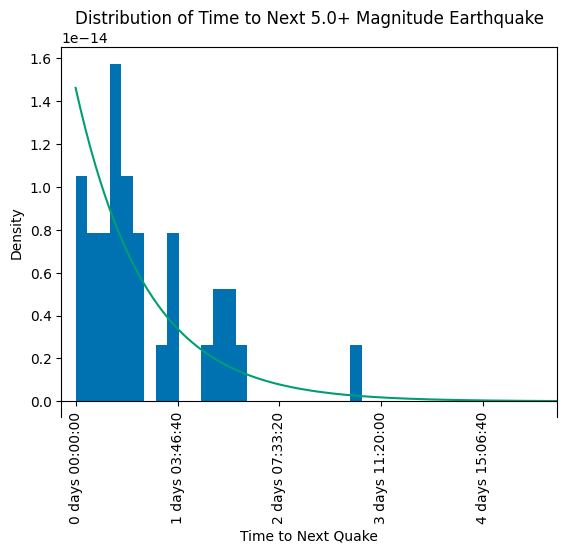

In [ ]:
# Plotting the observed data
df_mag5["intertime"].hist(density=True, bins=25, grid=False)
# Plotting the theoretical distribution
Exponential(rate=1/beta).plot()

# Cosmetic stuff
ax = plt.gca()
plt.ylabel(ylabel="Density")
plt.xlabel(xlabel="Time to Next Quake")
plt.title(label="Distribution of Time to Next 5.0+ Magnitude Earthquake")
xticks = [str(pd.Timedelta(i)) for i in ax.get_xticks()]
ax.set_xticklabels(xticks)
plt.xticks(rotation=90)
xlims = ax.get_xlim()
plt.show()

## Poisson Distribution

In [ ]:
# Get frequency of appropriate quakes by date
df_counts = df_mag5["date"].value_counts().to_frame().reset_index().rename(columns={"index": "date", "date": "freq"}).sort_values(by="date", ignore_index=True)

df_counts

,date,freq
0,2023-02-14,1
1,2023-02-15,2
2,2023-02-16,1
3,2023-02-17,1
4,2023-02-18,1
5,2023-02-20,2
6,2023-02-22,1
7,2023-02-23,3
8,2023-02-25,2
9,2023-02-27,3


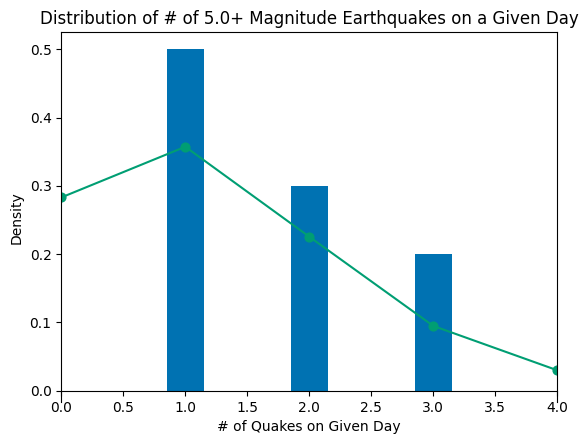

In [ ]:
# This makes it so our histogram bar centers line up with the dots on the theoretical distribution
bin_edges=[i+0.5 for i in list(range(min(df_counts["freq"])-1, max(df_counts["freq"])+1, 1))]

# This is the number of days in our timeframe
t=1
# This is our Poisson parameter mu
mu=lambd*t

# Plotting the observed data
df_counts["freq"].hist(density=True, bins=bin_edges, rwidth=0.3, grid=False)
# Plotting the theoretical distribution
Poisson(mu).plot()

# Cosmetic stuff
plt.ylabel(ylabel="Density")
plt.xlabel(xlabel="# of Quakes on Given Day")
plt.title(label="Distribution of # of 5.0+ Magnitude Earthquakes on a Given Day")
plt.xlim((0,max(df_counts["freq"])+1))
plt.show()